 # <center> Python codes to know the latest situation of COVID-19 in Nepal and World<center>

### Author: Dr. Sulove Koirala
#### Email: sulovekoirala@gmail.com

##  Introduction
We will be importing dataset from Github page maintained by Center for Systems Science and Engineering (CSSE) at Johns Hopkins University. Refresh the code to obtain the latest information. Feel free to email me for suggestions and enquiry. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
# Importing dataset containing confirmed cases
df=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
#Cleaning the Data
df=df.drop(["Province/State","Lat","Long"], axis=1)
df = df.set_index('Country/Region').stack().reset_index()
df.rename(columns={'level_1':'date',0:"cases", 'Country/Region':'country'}, inplace = True)
df['date'] = pd.to_datetime(df['date'])

In [3]:
# Importing dataset containing deaths 
data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
#Cleaning the Data
data=data.drop(["Province/State","Lat","Long"], axis=1)
data = data.set_index('Country/Region').stack().reset_index()
data.rename(columns={'level_1':'date',0:"deaths", 'Country/Region':'country'}, inplace = True)
data['date'] = pd.to_datetime(data['date'])

In [4]:
# Importing dataset containing recovered cases 
rec = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
# Cleaning the Data
rec=rec.drop(["Province/State","Lat","Long"], axis=1)
rec = rec.set_index('Country/Region').stack().reset_index()
rec.rename(columns={'level_1':'date',0:"recovered", 'Country/Region':'country'}, inplace = True)
rec['date'] = pd.to_datetime(rec['date'])

In [5]:
# Combining, Cases and Deaths (Not recovered, because it is uneqal in length)
data['cases'] = df['cases']
data.head()

,country,date,deaths,cases
0,Afghanistan,2020-01-22,0,0
1,Afghanistan,2020-01-23,0,0
2,Afghanistan,2020-01-24,0,0
3,Afghanistan,2020-01-25,0,0
4,Afghanistan,2020-01-26,0,0


# Analysis 

### Nepal

In [6]:
# Current Situation
print('As of', date.today())
print('Confirmed', data[(data['country']=="Nepal")][['cases']].max().values)
print('Death', data[(data['country']=="Nepal")][['deaths']].max().values)
print('Recovred', rec[(rec['country']=="Nepal")][['recovered']].max().values)

As of 2020-07-19
Confirmed [17502]
Death [40]
Recovred [11637]


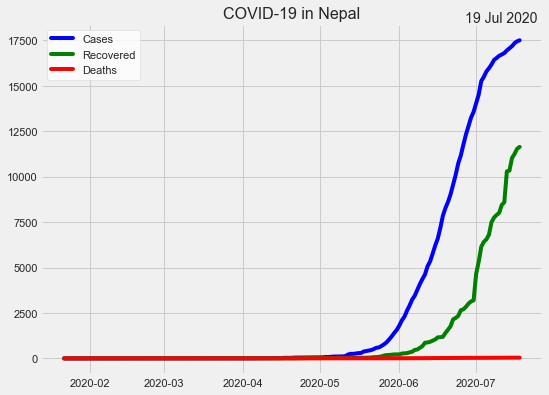

In [141]:
country_name = data[(data['country']=="Nepal")] # Select the name of the country
fig, ax = plt.subplots()
sns.set_style("white")
sns.lineplot(x = 'date', y = 'cases', data = country_name, color = 'blue', label = 'Cases')
sns.lineplot(x = 'date', y = 'recovered', data = rec[(rec['country']=="Nepal")], color = 'green', label = 'Recovered')
sns.lineplot(x = 'date', y = 'deaths', data = country_name, color = 'red', label = 'Deaths')
plt.xlabel('')
plt.ylabel('')
plt.title('COVID-19 in Nepal', size = 16)
ax.text(0.99, 1.038, date.today().strftime("%d %b %Y"), ha="right", va="top", transform=ax.transAxes)
plt.style.use('fivethirtyeight')
plt.show()

### World

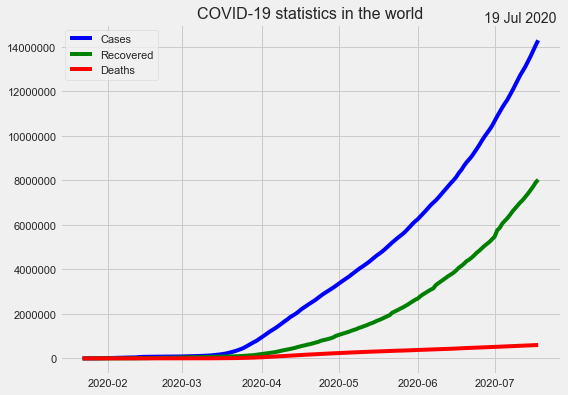

In [140]:
fig, ax = plt.subplots()
group_data = data.groupby('date').sum().reset_index()
group_rec = rec.groupby('date').sum().reset_index()
sns.lineplot(x = 'date', y = 'cases', data = group_data.reset_index(), color = 'blue', label = 'Cases')
sns.lineplot(x = 'date', y = 'recovered', data = group_rec.reset_index(), color = 'green', label = 'Recovered')
sns.lineplot(x = 'date', y = 'deaths', data = group_data.reset_index(), color = 'red', label = 'Deaths')
plt.title('COVID-19 statistics in the world', size = 16)
plt.xlabel('')
plt.ylabel('')
ax.text(0.99, 1.038, date.today().strftime("%d %b %Y"), ha="right", va="top", transform=ax.transAxes)
plt.style.use('fivethirtyeight')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

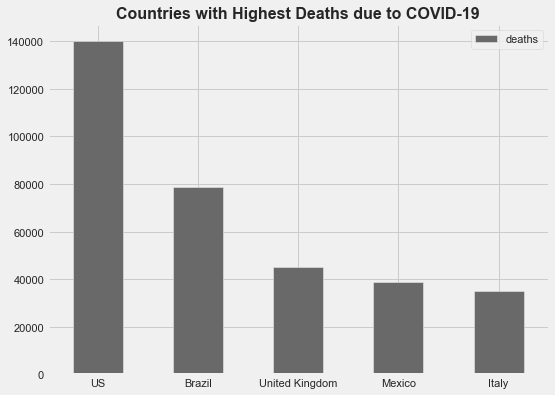

In [143]:
data.groupby('country').max().sort_values('deaths', ascending = False).head().plot.bar(y = 'deaths', color = 'dimgrey')
plt.xticks(rotation = 0)
plt.xlabel('')
plt.title('Countries with Highest Deaths due to COVID-19', fontsize=16, weight = 'bold')
plt.style.use('fivethirtyeight')
plt.show()

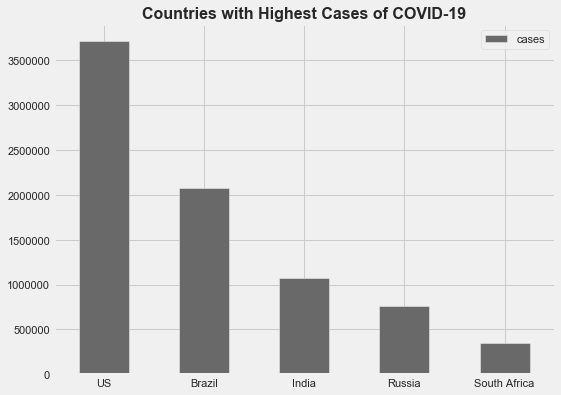

In [146]:
data.groupby('country').max().sort_values('cases', ascending = False).head().plot.bar(y = 'cases', color = 'dimgrey')
plt.xticks(rotation = 0)
plt.xlabel('')
plt.title('Countries with Highest Cases of COVID-19', fontsize=16, weight = 'bold')
plt.style.use('fivethirtyeight')
plt.show()

## Bibiliography

COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University
https://github.com/CSSEGISandData/COVID-19#covid-19-data-repository-by-the-center-for-systems-science-and-engineering-csse-at-johns-hopkins-university